<div style="text-align: center;">

# <strong>Atividade 4: Global Surrogates</strong>

#### Tópicos Avançados em IC 2 - 2024.2

#### Universidade Federal de Pernambuco (UFPE)

---

**Aluna:** Bruna Zamith Santos  

**Professor:** Dr. Ricardo Prudêncio

**Data:** 04/09/2024

---

</div>


# <a id="TOC">Tabela de Conteúdos</a>

- [**1. Introdução**](#Introducao)
- [**2. Bibliotecas**](#Bibliotecas)
- [**3. Conjunto de Dados**](#ConjuntoDados)
- [**4. Modelo Black-Box**](#BlackBox)
- [**5. Modelo Global Surrogate**](#Surrogate)

---

# <a id="Introducao">1. Introdução</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

Este notebook visa resolver a atividade proposta, com o seguinte enunciado:

> Treinem um modelo caixa-preta (e.g., Random Forest ou outro modelo pra variar) para uma base de dados do seu interesse. Crie um global surrogate caixa-branca (e.g., Árvore de Decisão), que simule esse modelo caixa-preta aprendido. Façam o upload do notebook.

> Observe em que situações o Global Surrogate apresenta uma fidelidade alta em relação ao modelo caixa-preta.
---

# <a id="Bibliotecas">2. Bibliotecas</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [1]:
# Descomente a linha a seguir, se for rodar no seu computador!

#!pip3 install matplotlib numpy pandas scikit-learn

In [2]:
from IPython.display import HTML

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

---

# <a id="ConjuntoDados">3. Conjunto de Dados</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

A conjunto de dados escolhido foi o *"Predict Students' Dropout and Academic Success"*, do UCI ([link](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)). 

Ele advém do paper [*"Early prediction of student's performance in higher education: a case study"*](https://link.springer.com/chapter/10.1007/978-3-030-72657-7_16), de Mónica V. Martins, Daniel Tolledo, Jorge Machado, Luís M. T. Baptista, e Valentim Realinho. 2021. Publicado em *"Trends and Applications in Information Systems and Technologies"*.

A descrição dele é dada como:

> Um conjunto de dados criado a partir de uma instituição de ensino superior (adquirido de vários bancos de dados distintos) relacionado a estudantes matriculados em diferentes cursos de graduação, como agronomia, design, educação, enfermagem, jornalismo, gestão, serviço social e tecnologias. O conjunto de dados inclui informações conhecidas no momento da matrícula dos estudantes (caminho acadêmico, dados demográficos e fatores socioeconômicos) e o desempenho acadêmico dos estudantes ao final do primeiro e do segundo semestres. Os dados são usados para construir modelos de classificação para prever a evasão e o sucesso acadêmico dos estudantes. O problema é formulado como uma tarefa de classificação em três categorias, na qual há um forte desequilíbrio em direção a uma das classes.

A descrição de cada uma das features pode ser encontrada na [página do UCI](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success).

In [3]:
df = pd.read_csv('data.csv', sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Temos 3 classes distintas nesse caso: Graduate, Dropout e Enrolled.

No entanto, optei por excluir os alunos cujo status é "Enrolled", afinal eles ainda estão passíveis de evadirem ("Dropout").

Portanto, com base na suposição acima, posso tratar o target como binário, removendo todos os exemplos de "Enrolled". Por fim, converti a coluna "Target": "Graduate" para 0 (negativo) e "Dropout" para 1 (positivo).
</div>

In [8]:
df = df[df.Target.isin(['Graduate', 'Dropout'])].reset_index(drop=True)
df['Target'] = df.Target.map({'Graduate': 0, 'Dropout': 1})
df.shape

(3630, 37)

In [9]:
X = df.drop(columns=['Target'])
y = df.Target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Como optei pelo algoritmo Multi-Layer Perceptron (MLP) para meu modelo Black-Box, é necessário normalizar as features, já que o algoritmo é sensível às suas escalas. Assim, aplico o scaler a seguir e só uso os dados normalizados quando necessário.
</div>

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

# <a id="BlackBox">4. Modelo Black-Box</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [12]:
models = dict()
y_preds_train = dict()
y_preds_test = dict()

In [13]:
models['black_box'] = MLPClassifier(
    random_state=42,
    max_iter=2500,
    learning_rate='adaptive',
    hidden_layer_sizes=(500,),
    early_stopping=True
).fit(X_train_scaled, y_train)

In [14]:
y_preds_train['black_box'] = models['black_box'].predict(X_train_scaled)
y_preds_test['black_box'] = models['black_box'].predict(X_test_scaled)

In [15]:
# Train
print(classification_report(y_train, y_preds_train['black_box']))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1645
           1       0.92      0.81      0.86      1077

    accuracy                           0.90      2722
   macro avg       0.90      0.88      0.89      2722
weighted avg       0.90      0.90      0.90      2722



In [16]:
# Test
print(classification_report(y_test, y_preds_test['black_box']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.92      0.78      0.85       344

    accuracy                           0.89       908
   macro avg       0.90      0.87      0.88       908
weighted avg       0.90      0.89      0.89       908



<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
O MLP obteve um resultado igual a 0.89 para macro f1-score no teste (vs 0.90 no treino), o que considerei satisfatório. Além disso, não há indicativo de overfitting. Logo, continuarei para o treinamento do modelo Global Surrogate.
</div>

# <a id="Surrogate">5. Modelo Global Surrogate</a>
*Voltar à [Tabela de Conteúdos](#TOC)*

In [17]:
models['surrogate_1'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    min_samples_leaf=5,
    random_state=42
).fit(X_test_scaled, y_preds_test['black_box'])

In [18]:
y_preds_test['surrogate_1'] = models['surrogate_1'].predict(X_test_scaled)

In [19]:
r2 = r2_score(y_preds_test['black_box'], y_preds_test['surrogate_1'])
round(r2, 2)

0.91

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
O modelo Global Surrogate obteve uma pontuação r2 igual a 0.91, o que também considerei satisfatório. Ou seja, é um bom indicativo de que o modelo Global Surrogate aprendeu a replicar bem o modelo Black-Box. 

Por fim, é preciso atentar ao fato de que no capítulo 8.6 do livro [Interpretable Machine Learning - Christoph Mohnar](https://christophm.github.io/interpretable-ml-book/global.html), o autor destaca que não existe um cut-off exato para o r2.
</div>

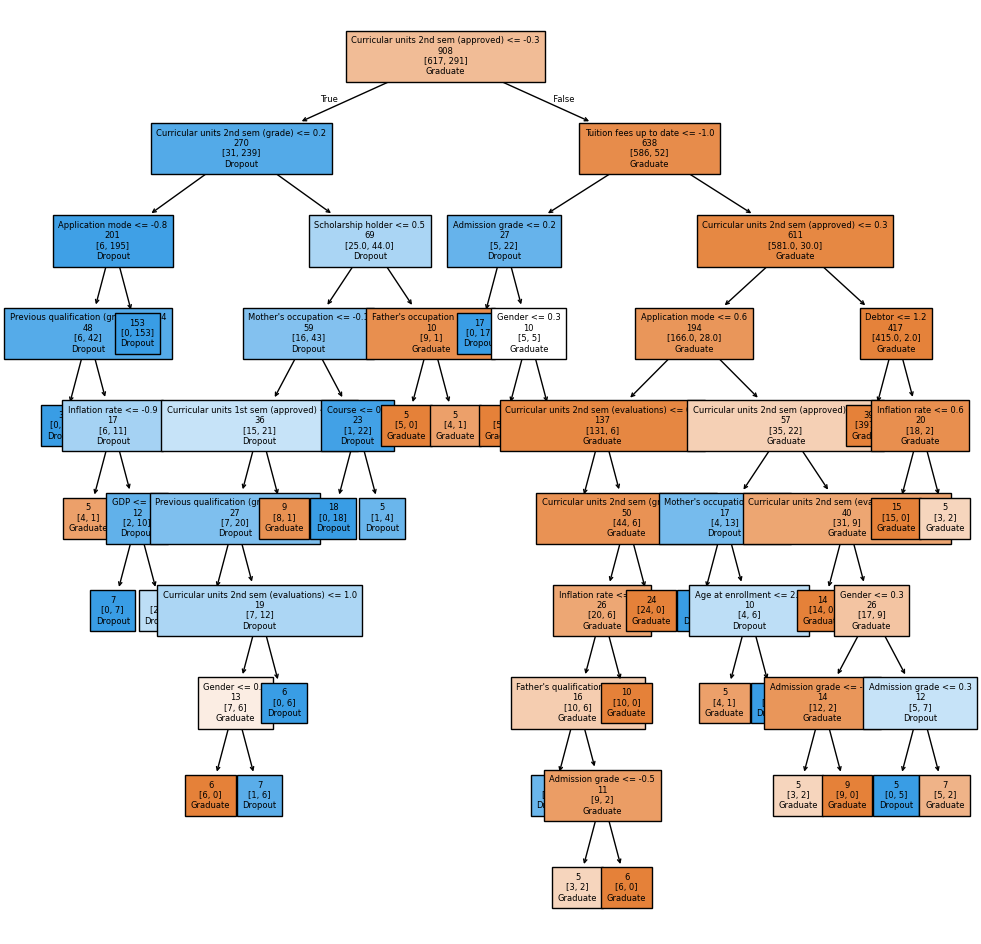

In [20]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(
    models['surrogate_1'],
    fontsize=6,
    filled=True,
    feature_names=list(X_test.columns),
    class_names=['Graduate', 'Dropout'],
    label='none',
    impurity=False,
    node_ids=False,
    precision=1
)
plt.show()

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Como vimos, o modelo Global Surrogate parece bem fiel ao modelo Black-Box. No entanto, ainda é dificil interpretá-lo pois ele está relativamente complexo.

Vamos tentar deixar o modelo Global Surrogate mais simples, para maior interpretabilidade.
</div>

In [21]:
models['surrogate_2'] = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=20,
    random_state=42
).fit(X_test_scaled, y_preds_test['black_box'])

In [22]:
y_preds_test['surrogate_2'] = models['surrogate_2'].predict(X_test_scaled)

In [23]:
r2 = r2_score(y_preds_test['black_box'], y_preds_test['surrogate_2'])
round(r2, 2)

0.68

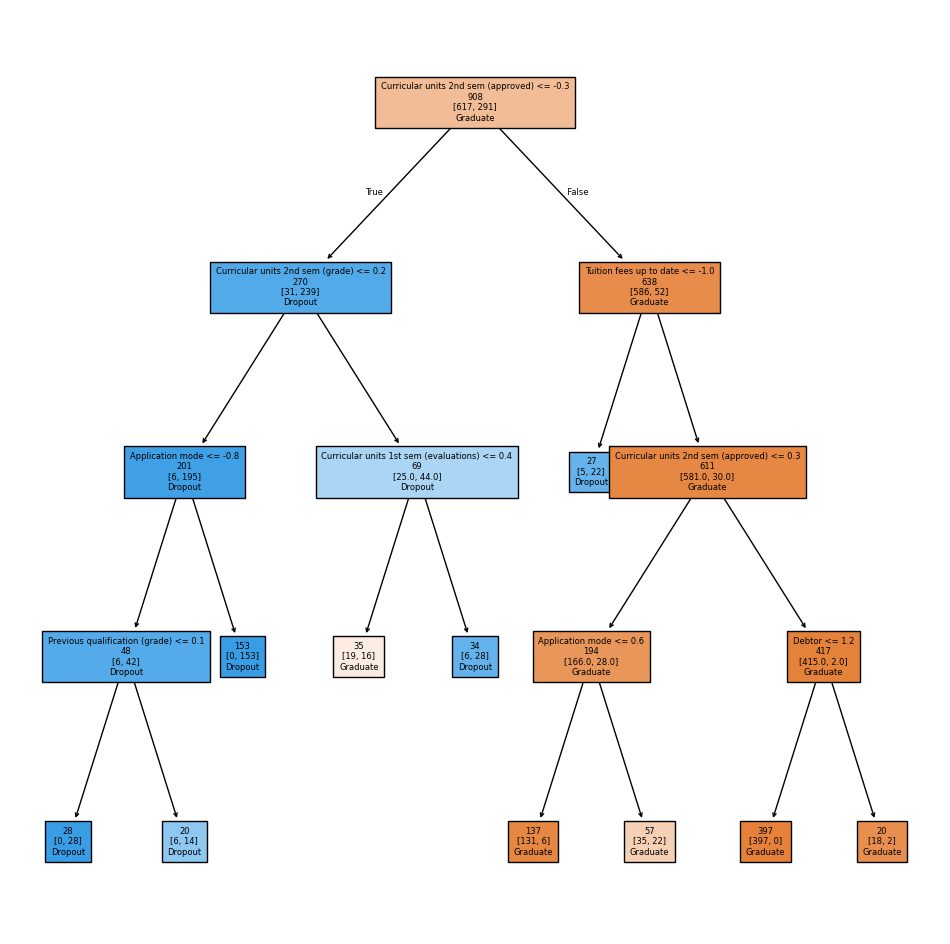

In [24]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(
    models['surrogate_2'],
    fontsize=6,
    filled=True,
    feature_names=list(X_test.columns),
    class_names=['Graduate', 'Dropout'],
    label='none',
    impurity=False,
    node_ids=False,
    precision=1
)
plt.show()

<div style="border: 1px solid #007BFF; border-radius: 5px; padding: 10px; background-color: #f0f8ff;">
Agora o modelo ficou muito mais fácil de ser interpretado, inclusive destacando as features mais importantes.

Contudo, com a pontuação r2 igual a 0.68, perdeu-se muito da fidelidade do modelo Global Surrogate em relação ao modelo Black-Box.

Assim, é importante sempre fazer o trade-off e otimizar a Fidelidade com Interpretalidade.
</div>

---